In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy as np

from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

credentials

## Simulated data from Gaussian distributions

We create

In [2]:
np.random.seed(0)
np.set_printoptions(suppress=True)

In [7]:
N = 100
weight = 1
### for 2 normal distributions

bmg = np.concatenate((
    np.random.normal(15, 1, int(weight * N)),
    np.random.normal(20, 1, int(weight * N)),
    np.random.normal(28.7, 1.8, int(weight * N))
))

# for noise
noise_bmg = 0.5

# Data
data = np.random.normal(bmg, noise_bmg)[:, np.newaxis]

# make X axis for plots
x = np.linspace(5, 35, 3 * N + 1)

(array([0.01636114, 0.09325851, 0.057264  , 0.06053623, 0.08835017,
        0.0114528 , 0.00818057, 0.04908343, 0.07526126, 0.03108617]),
 array([11.49413531, 13.53148279, 15.56883028, 17.60617776, 19.64352524,
        21.68087273, 23.71822021, 25.75556769, 27.79291518, 29.83026266,
        31.86761014]),
 <a list of 10 Patch objects>)

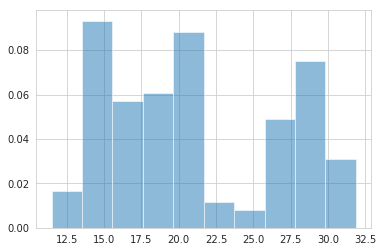

In [8]:
plt.hist(data, bins='auto', alpha=.5, density=True)

# Fit Gaussian Mixture Model (GMM)


Assuming the data is the sum of one or more gaussians.
Easily handles multidimensional case as well.



Fit:
      1: Mean 24.88, var 1.264, weight 0.3278
      2: Mean 15.01, var 1.291, weight 0.3386
      3: Mean 20.15, var 1.336, weight 0.3335



Text(0.5, 1.0, 'Gaussian Mixture Model')

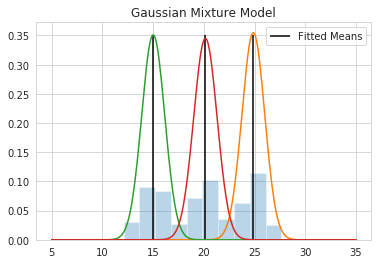

In [5]:
gmm = GaussianMixture(n_components=3, covariance_type='spherical')
gmm.fit(data)

mu1 = gmm.means_[0, 0]
mu2 = gmm.means_[1, 0]
mu3 = gmm.means_[2, 0]
var1, var2, var3 = gmm.covariances_
wgt1, wgt2, wgt3 = gmm.weights_
print(
    '''Fit:
      1: Mean {:.4}, var {:.4}, weight {:.4}
      2: Mean {:.4}, var {:.4}, weight {:.4}
      3: Mean {:.4}, var {:.4}, weight {:.4}
'''.format(mu1, var1, wgt1, mu2, var2, wgt2, mu3, var3, wgt3)
)

plt.hist(data, bins='auto', alpha=.3, density=True)
plt.vlines((mu1, mu2, mu3), ymin=0, ymax=0.35, label='Fitted Means')
plt.plot(x, norm.pdf(x, mu1, np.sqrt(var1)))
plt.plot(x, norm.pdf(x, mu2, np.sqrt(var2)))
plt.plot(x, norm.pdf(x, mu3, np.sqrt(var3)))
plt.legend()
plt.title('Gaussian Mixture Model')

# How many components?
The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset. A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid over-fitting. Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC). Scikit-Learn's GMM estimator actually includes built-in methods that compute both of these, and so it is very easy to operate on this approach.

Let's look at the AIC and BIC as a function as the number of GMM components for our moon dataset:

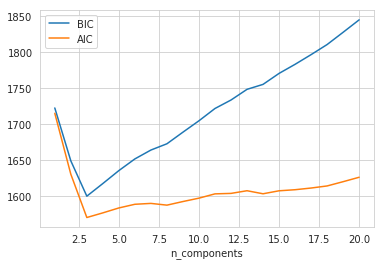

In [6]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='spherical', random_state=0).fit(data)
          for n in n_components]

plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC tells us that our choice of 16 components above was probably too many: around 8-12 components would have been a better choice. As is typical with this sort of problem, the BIC recommends a simpler model.

Notice the important point: this choice of number of components measures how well GMM works as a density estimator, not how well it works as a clustering algorithm. I'd encourage you to think of GMM primarily as a density estimator, and use it for clustering only when warranted within simple datasets.

# 1d GMM Modeling Literature

https://km3pipe.readthedocs.io/en/latest/auto_examples/stats/plot_fitting_dists.html

B.W. Silverman, “Density Estimation for Statistics and Data Analysis”
Hastie, Tibshirani and Friedman, “The Elements of Statistical Learning: Data Mining, Inference, and Prediction”, Springer (2009)
Liu, R., Yang, L. “Kernel estimation of multivariate cumulative distribution function.” Journal of Nonparametric Statistics (2008)